In [540]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

1 Gradient morphologique 

On fait le gradient morphologique de notre image $ampoule.png*. On va tout d'abord calculer son gradient avec un élément structurant de type $ellipse$ et de paramètre $(7,7)$. \n
Afin d'éliminer les reflets blanc de l'ampoule, on va effectuer un ... \n
On calcule ensuite le nouveau gradient obtenue. On analyse l'effet de la  taille de l'élément structurant.

Text(0.5, 1.0, 'gradient morphologique')

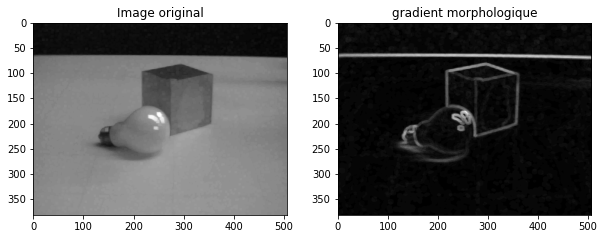

In [541]:
Im_am = cv2.imread('Ampoule.png', 0)
Element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
Im_am_dil = cv2.dilate(Im_am,Element, iterations = 1)
Im_am_er = cv2.erode(Im_am,Element, iterations = 1)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(Im_am, 'gray')
plt.title('Image original')

plt.subplot(122)
plt.imshow(Im_am_dil-Im_am_er, 'gray')
plt.title('gradient morphologique')

Text(0.5, 1.0, 'Retrait des reflets blancs de notre ampoule')

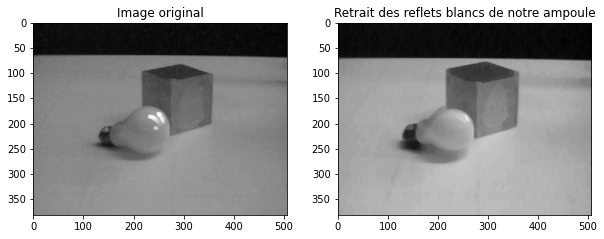

In [542]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(Im_am, 'gray')
plt.title('Image original')

Element2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,12))

Im_am_fer = cv2.erode(Im_am, Element2, iterations=1)

plt.subplot(122)
plt.imshow(Im_am_fer, 'gray')
plt.title('Retrait des reflets blancs de notre ampoule')

Text(0.5, 1.0, 'gradient morphologique sans reflets')

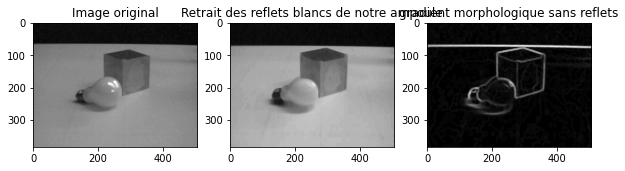

In [543]:
Im_am_dil2 = cv2.dilate(Im_am_fer, Element, iterations = 1)
Im_am_er2 = cv2.erode(Im_am_fer, Element, iterations = 1)

plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(Im_am, 'gray')
plt.title('Image original')

plt.subplot(132)
plt.imshow(Im_am_fer, 'gray')
plt.title('Retrait des reflets blancs de notre ampoule')

plt.subplot(133)
plt.imshow(Im_am_dil2-Im_am_er2, 'gray')
plt.title('gradient morphologique sans reflets')

2 Comptage d'éléments

Il est questions de calculer automatiquement le nombre de cercles noirs contenus dans l'image $blobs2.png$
Il faut tout d'abord calculer la carte des distances de l'image originale.
Puis calculer les maxima locaux de cette carte de distance
Enfin, déduire le nombre de cercle.

Text(0.5, 1.0, 'Carte des distances')

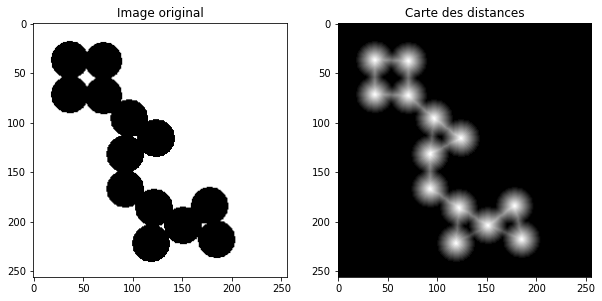

In [544]:
Im_b = cv2.imread('blobs2.png', 0)
Im_b_map = 255 - Im_b
Im_b_map = cv2.distanceTransform(Im_b_map,cv2.DIST_L2,3)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(Im_b, 'gray')
plt.title('Image original')

plt.subplot(122)
plt.imshow(Im_b_map, 'gray')
plt.title('Carte des distances')

Text(0.5, 1.0, 'Recherche des minimum')

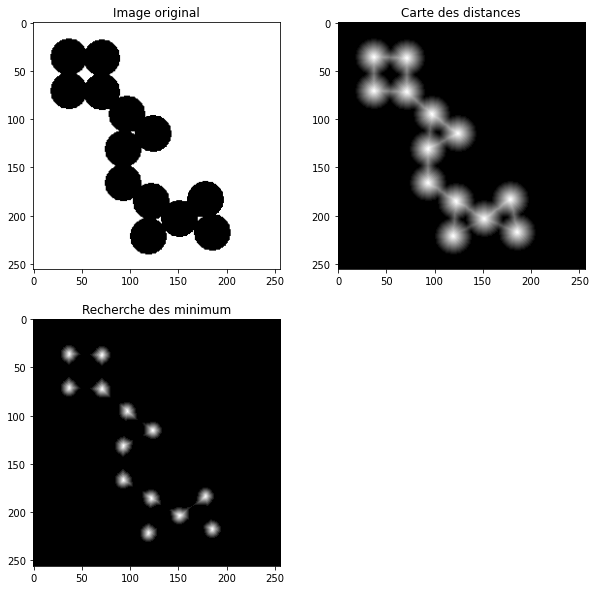

In [545]:
Elementb = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(Im_b, 'gray')
plt.title('Image original')
plt.subplot(222)
plt.imshow(Im_b_map, 'gray')
plt.title('Carte des distances')


Im_b_min = cv2.erode(Im_b_map,Elementb,iterations=1)

plt.subplot(223)
plt.imshow(Im_b_min, 'gray')
plt.title('Recherche des minimum')

13


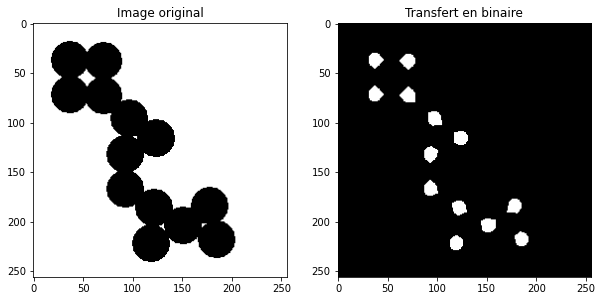

In [546]:
Im_b_end = Im_b_min > 2

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(Im_b, 'gray')
plt.title('Image original')

plt.subplot(122)
plt.imshow(Im_b_end, 'gray')
plt.title('Transfert en binaire')

Im_b_end = np.uint8(Im_b_end)

aj,aj2 = cv2.connectedComponents(Im_b_end, connectivity=4)

print(aj-1)


3 Détection de strucytures d'intérêts

Quelles opérations appliquer pour faire ressortir les structures vasculaires ed l'image originale
Comparer et commenter l'efficacité des differentes opérations implémentées

Text(0.5, 1.0, 'Bottom-hat')

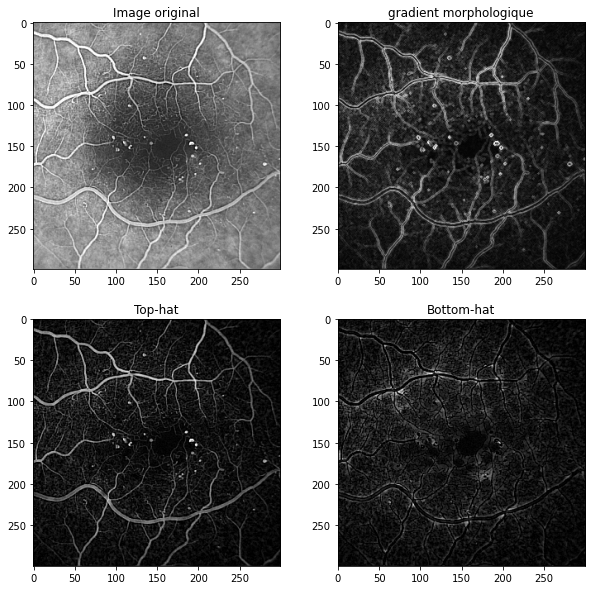

In [547]:
Im_an = cv2.imread('angiogram.png', 0)
Elementan = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
Im_an_dil = cv2.dilate(Im_an,Elementan, iterations = 1)
Im_an_er = cv2.erode(Im_an,Elementan, iterations = 1)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(Im_an, 'gray')
plt.title('Image original')

plt.subplot(222)
plt.imshow(Im_an_dil-Im_an_er, 'gray')
plt.title('gradient morphologique')

Elementan2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
Im_an_top = cv2.morphologyEx(Im_an, cv2.MORPH_TOPHAT,Elementan2)

plt.subplot(223)
plt.imshow(Im_an_top, 'gray')
plt.title('Top-hat')

Im_an_bl = cv2.morphologyEx(Im_an, cv2.MORPH_BLACKHAT,Elementan2)

plt.subplot(224)
plt.imshow(Im_an_bl, 'gray')
plt.title('Bottom-hat')



4 Reconstructions morphologiques

CAS 1
Obtenir l'image de marqueur M permettant la suppression des caractères souhaités
Effectuer la reconstruction morphologique jusqu'à convergence avec l'image original comme masque.

Text(0.5, 1.0, 'resultat')

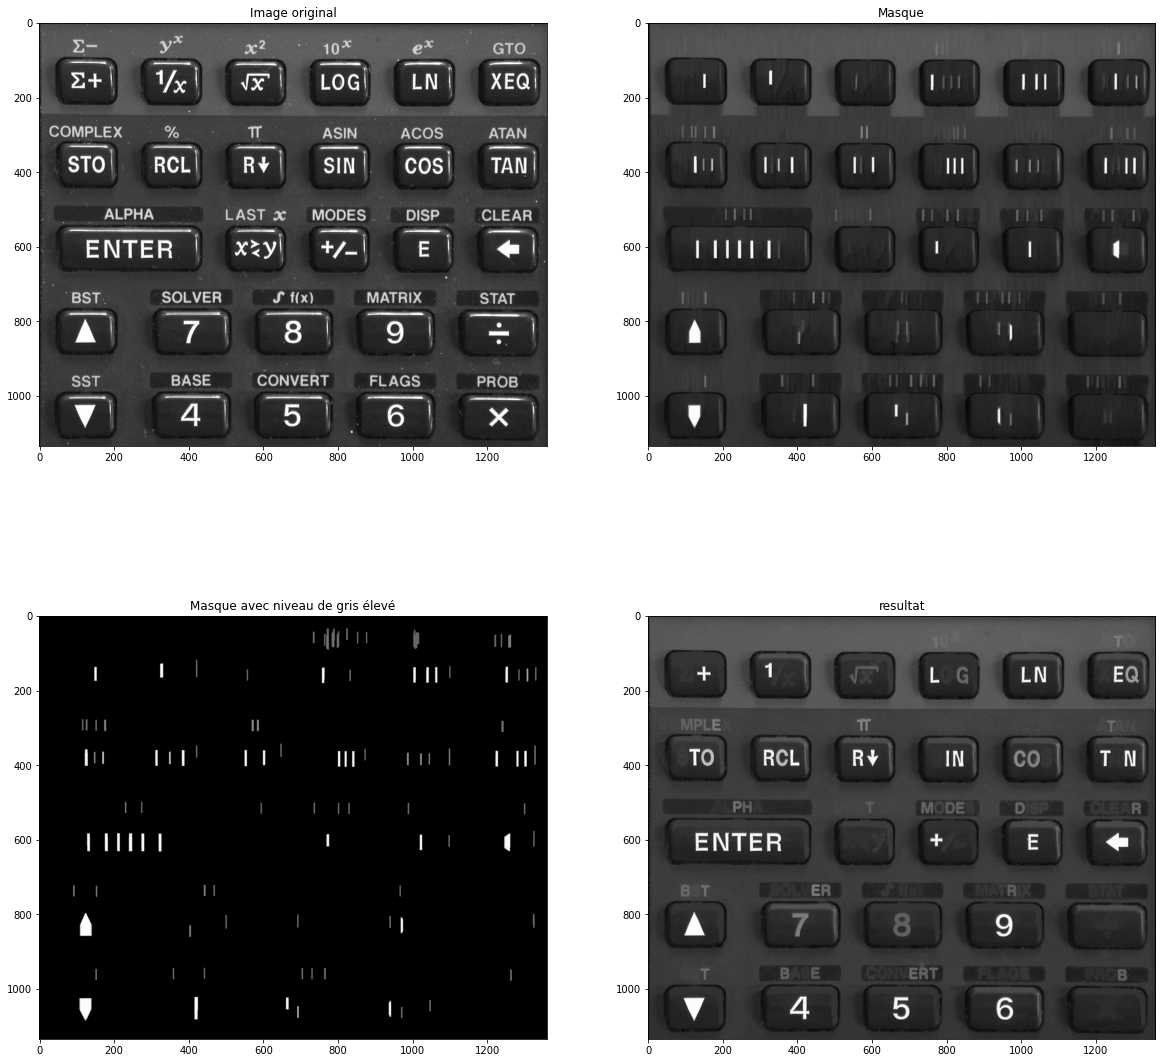

In [558]:
Im_c = cv2.imread('calculator.png', 0)
Elementc = cv2.getStructuringElement(cv2.MORPH_RECT,(4,30))
Im_c_ouv = cv2.morphologyEx(Im_c,cv2.MORPH_OPEN, Elementc)


plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(Im_c, 'gray')
plt.title('Image original')

plt.subplot(222)
plt.imshow(Im_c_ouv, 'gray')
plt.title('Masque')
Elementc2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))


Im_c_ouv[Im_c_ouv<100] = 0

plt.subplot(223)
plt.imshow(Im_c_ouv, 'gray')
plt.title('Masque avec niveau de gris élevé')







s = np.size(Im_c)

Im_c_ouv_1 = Im_c
while (np.linalg.norm(np.reshape(Im_c_ouv,s))-np.linalg.norm(np.reshape(Im_c_ouv_1,s))) != 0 :
    Im_c_ouv_1 = Im_c_ouv
    Im_c_ouv = cv2.dilate(Im_c_ouv, Elementc2, iterations = 1)
    Im_c_ouv = np.minimum(Im_c_ouv,Im_c)

plt.subplot(224)
plt.imshow(Im_c_ouv, 'gray')
plt.title('resultat')